<a href="https://colab.research.google.com/github/tlchampion/simpsons_character_recognition/blob/main/notebooks/01_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import modules

In [2]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import PIL 
import PIL.Image
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from pathlib import Path

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
import sys
sys.path.insert(0,"/content/drive/My Drive/Projects/simpsons_character_recognition/simpsons_images")

In [33]:
! pip install python-dotenv

## Define directories used

In [4]:
basedir = '/content/drive/MyDrive/Projects/simpsons_character_recognition'
train_directory = os.path.join(basedir, 'data/images/simpsons_dataset')
test_directory = os.path.join(basedir,'data/images/simpsons_testset')

## Create dataframe mapping test images to image labels

Images for the test dataset are not organized into folders. The labels are part of the filename, so we need to create a list of the files that we can then modify and use as part of the ImageDataGenerator process later to make the test dataset.

In [64]:
testfiles = pd.DataFrame(os.listdir(test_directory),columns=['filename'])

In [65]:
testlabels = testfiles['filename'].str.split(".", expand=True)

In [66]:
testlabels = testlabels[0].str.rpartition('_', expand=True)

In [67]:
data = [testfiles, testlabels]
test_data_files = pd.concat(data, axis=1)
test_data_files = test_data_files.drop(columns=[1,2])
test_data_files.rename(columns={'filename':'filename', 0:'label'}, inplace=True)

# Define ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2, 
                                   horizontal_flip=True, 
                                   vertical_flip=True)


## Generate train and validation datasets

In [ ]:
train = datagen.flow_from_directory(directory=train_directory, 
                                    batch_size=32, 
                                    target_size=(224,224),
                                    class_mode='categorical',
                                    subset='training',
                                    seed=42,
                                    shuffle=True)

Found 16764 images belonging to 42 classes.


In [ ]:
validation = datagen.flow_from_directory(directory=train_directory, 
                                    batch_size=32, 
                                    target_size=(224,224),
                                    class_mode='categorical',
                                    subset='validation',
                                    seed=42,
                                    shuffle=True)

Found 4169 images belonging to 42 classes.


## Generate test dataset
use DataFrame created earlier to match test images with lables

In [ ]:
test = datagen.flow_from_dataframe(
    dataframe=test_data_files,
    directory=test_directory,
    X_col="location",
    y_col="label",
    batch_size=32,
    class_mode=None,
    seed=42,
    shuffle=False
)

Found 990 validated image filenames.


In [ ]:

def show_sample_images_from_datagen(data=train, num=1):
  import random
  image_labels = {}
  temp_dict = data.class_indices
  for key, value in temp_dict.items():
    image_labels[value] = key

  batch = data[random.randint(0,len(data))]

  if batch[0].shape[0] < 9:
    nbr = batch[0].shape[0]
  else:
    nbr = 9
  imgs = set()
  while len(imgs) < nbr:
    imgs.add(random.randint(0, batch[0].shape[0]))
  j = 1
  plt.figure(figsize=(10,10))
  for i in imgs:
    ax = plt.subplot(3,3,j)
    img = batch[0][i]
    plt.imshow(img)
    label = np.argmax(batch[1][i])
    label_name = image_labels[label]
    plt.title(label_name)
    plt.axis('off')
    j += 1
  plt.show()



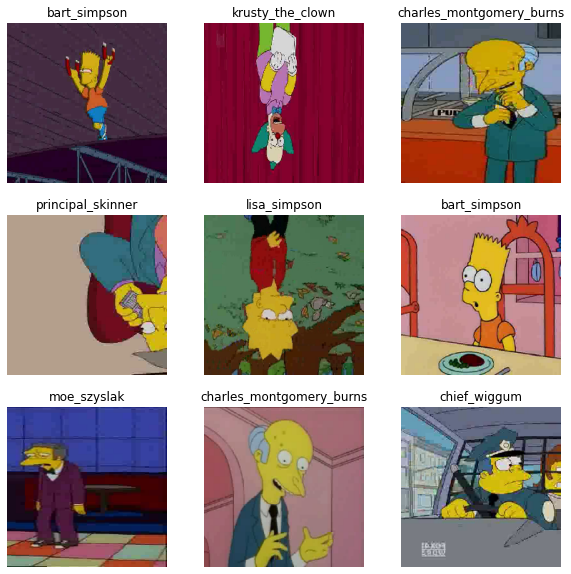

In [ ]:
show_sample_images_from_datagen(train, 2)

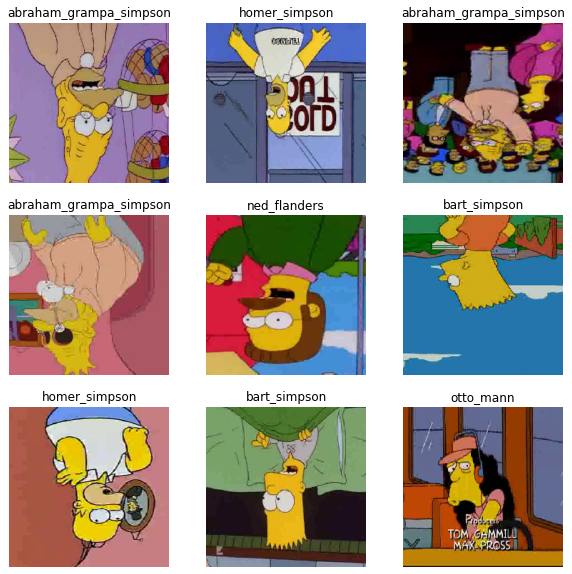

In [ ]:
show_sample_images_from_datagen(train, 2)

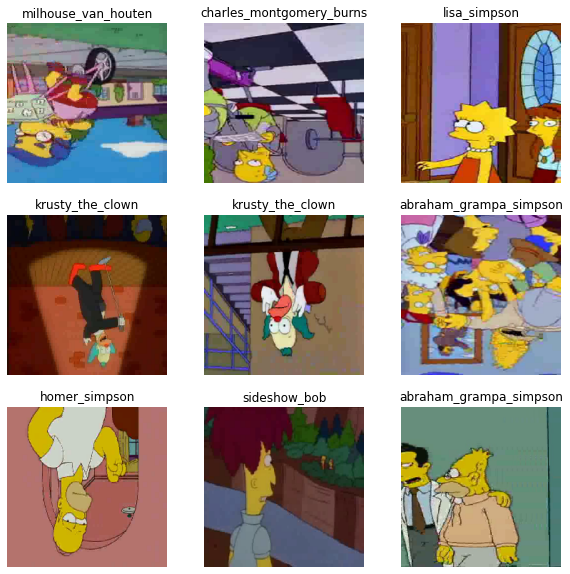

In [ ]:
show_sample_images_from_datagen(train, 2)